In [1]:
import matplotlib
print(matplotlib.__version__)

3.7.0


In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerPathCollection
np.set_printoptions(suppress=True, precision=6)

In [2]:
import matplotlib.font_manager as fm

TEXT_FONT_SIZE = 6
TITLE_FONT_SIZE = 6.5
MARKER_SIZE = 2
LINE_WIDTH = 1

plt.rcParams['font.size'] = TEXT_FONT_SIZE 
plt.rcParams['axes.linewidth'] = 0.2
plt.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['legend.fontsize'] = TEXT_FONT_SIZE 
mpl.rcParams['axes.titlesize'] = TITLE_FONT_SIZE 
mpl.rcParams['axes.labelsize'] = TEXT_FONT_SIZE 
plt.rcParams['axes.facecolor'] = '#F8F8F8'

# Define a list of colors for the color cycle
color_cycle = ['#AA4499', '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255']

**Data initialization**

**Without resource constraint**

In [3]:
loaded_data = np.load("../../../../datastore/explosive_sync/Small world network/data_adaptive-a_0.01_b_0.npz")

# Access the arrays using the keys provided while saving
GLOBAL_ORDER_VERBOSE_NRC = loaded_data['arr1']
LAMBDA_O_NRC_ = loaded_data['arr2']
# LAMBDA_NRC_ = loaded_data['arr3']

print("done")

done


In [8]:
#del loaded_data
del GLOBAL_ORDER_VERBOSE_NRC
del LAMBDA_O_NRC_
del LAMBDA_NRC_

**resource constraint**

In [4]:
loaded_data = np.load("../../../../datastore/explosive_sync/Small world network/data_adaptive-a_0.01_b_0.002.npz")

GLOBAL_ORDER_VERBOSE_RC = loaded_data['arr1']
LAMBDA_O_RC_ = loaded_data['arr2']
LAMBDA_RC_ = loaded_data['arr3']

print("done")

done


In [5]:
noise = np.random.normal(loc=0.0, scale=0.006, size=LAMBDA_O_RC_.shape)
LAMBDA_O_RC_noise = LAMBDA_O_RC_ + noise

In [6]:
del loaded_data
del GLOBAL_ORDER_VERBOSE_RC
del LAMBDA_O_RC_
del LAMBDA_RC_

**Synchronization Window**

In [9]:
WINDOW_SIZE = 20000
unique_lambda_o = np.unique(np.around(LAMBDA_O_RC_, 3))
reversed_array = np.flip(unique_lambda_o)[1:]
unique_lambda_o = np.concatenate([unique_lambda_o, reversed_array])[1:]

window_size = 20000
stride = 20000
num_bins = 10
th_global_order = 0.7

num_windows = int((len(GLOBAL_ORDER_VERBOSE_RC) - window_size) / stride) + 1

# Initialize array to store window distributions
window_distributions = np.zeros((num_windows, num_bins)) # assuming 101 bins for the histogram

#Average synchronized time
window_avg_synchronized = np.zeros(num_windows)

# Iterate through time series with sliding window
for i in range(num_windows):
    # Extract data for current window
    window_data = GLOBAL_ORDER_VERBOSE_RC[i*stride:i*stride+window_size]
    
    # Calculate histogram of global order within window
    window_histogram, bin_edges = np.histogram(window_data, bins=num_bins, range=(0, 1))
    
    # Normalize histogram
    #window_histogram = window_histogram / np.sum(window_histogram)
    
    # Fraction of points which crossed threshold for global synchrony
    avg_synchronized = np.count_nonzero(np.where(window_data > th_global_order)) / window_size
    
    # Store normalized histogram in array
    window_distributions[i,:] = window_histogram
    
    window_avg_synchronized[i] = avg_synchronized

window_distributions.shape
bin_edges = np.around(bin_edges, 2)
unique_lambda_o.shape

(60,)

In [10]:
LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_NRC_[:len(LAMBDA_O_NRC_)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_NRC_[len(LAMBDA_O_NRC_)//2:len(LAMBDA_O_NRC_)], return_index=True)

**Plot Graph**

In [11]:
# Define the sigmoid function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-(x-b)/c))

def avg_sync_time(lambda_o):
    lambda_bw = 0.03
    lambda_fw = 0.06
    beta_by_alpha = 0.2
    sync_time = np.log( (lambda_fw - lambda_o + beta_by_alpha) / (lambda_bw - lambda_o + beta_by_alpha) )
    desync_time = np.log( (lambda_o - lambda_bw) / (lambda_o - lambda_fw) )
    
    return sync_time / (sync_time + desync_time)

/tmp/ipykernel_9134/1654702777.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  desync_time = np.log( (lambda_o - lambda_bw) / (lambda_o - lambda_fw) )


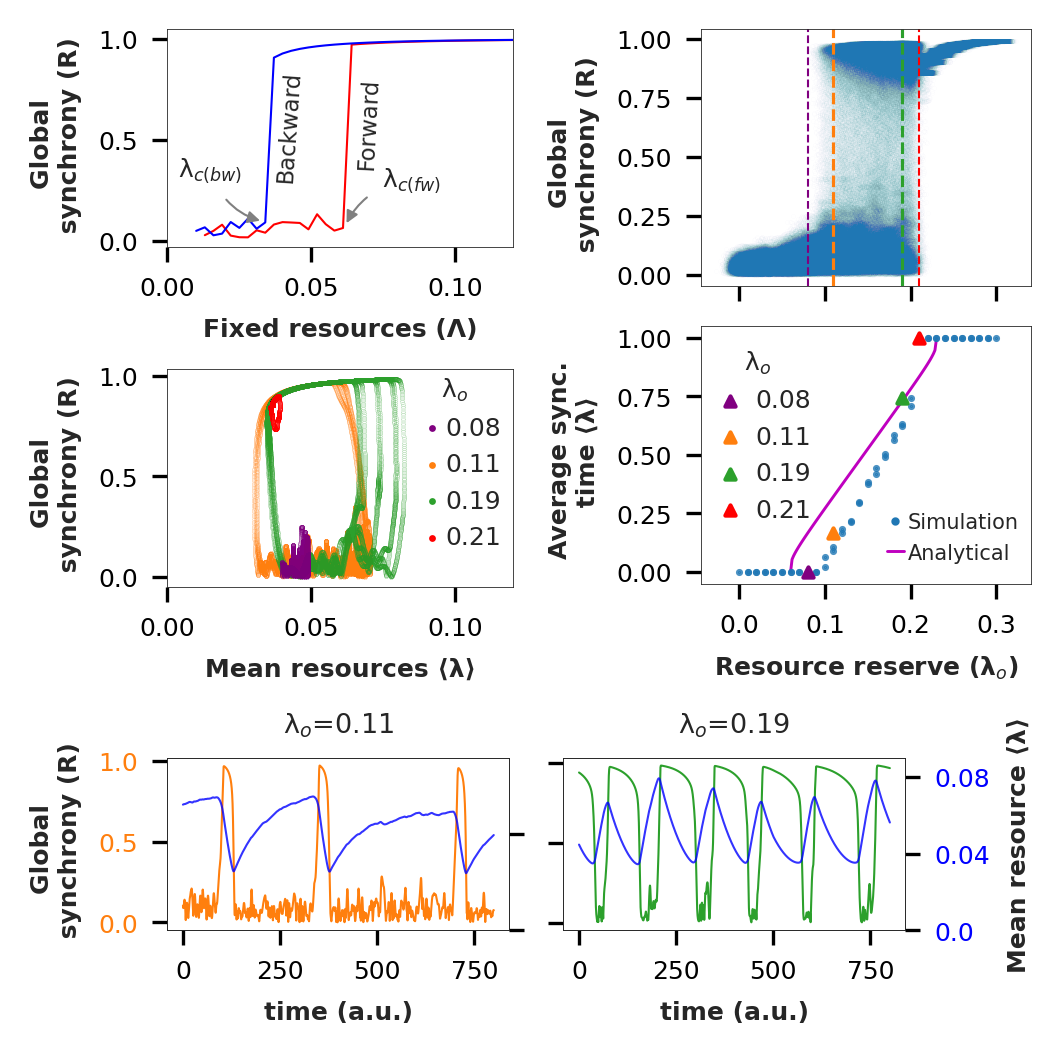

In [13]:
import seaborn as sns
sns.set_style("white", {"axes.labelsize": 12}) 
style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)


fig = plt.figure(figsize=(3.42, 3.4), dpi=300)
fig.set_constrained_layout(True)

subfigs = fig.subfigures(2, 1, height_ratios=[2, 1], hspace=0.01)
subfigsnest = subfigs[0].subfigures(1, 2)

gs1 = GridSpec(2, 1, figure=subfigsnest[0], hspace=0.01)

ax1 = subfigsnest[0].add_subplot(gs1[0, :])
ax3 = subfigsnest[0].add_subplot(gs1[1, :])

gs2 = GridSpec(2, 1, figure=subfigsnest[1])
ax2 = subfigsnest[1].add_subplot(gs2[0, :])
ax4 = subfigsnest[1].add_subplot(gs2[1, :], sharex=ax2)
ax2.tick_params(axis="x", labelbottom=False)

gs3 = GridSpec(1, 6, figure=subfigs[1])
ax5 = subfigs[1].add_subplot(gs3[0, 0:3])
ax6 = subfigs[1].add_subplot(gs3[0, 3:6])
# ax6.tick_params(axis="y", labelbottom=False)

start = 970000 + 3000
end = start + 16000
DT = 0.05
MEAN_LAMBDA = np.mean(LAMBDA_RC_[:, start:end], axis=0)

color_08 = 'purple' 
color_11 = 'tab:orange' 
color_17 = 'tab:green' 
color_21 = 'red' 

color_no_rc_fwd = "red"
color_no_rc_bkwd = "blue"
color_rc = "C0"

"""
----------------------------------------------------------------------------
No resource constraint
----------------------------------------------------------------------------
"""
ax1.set_xlabel('Fixed resources (Λ)', weight='bold') 
ax1.set_ylabel('Global \n synchrony (R)', weight='bold')
ax1.set_xlim(right = 0.12)
ax1.plot(LAMBDA_O_fwd, GLOBAL_ORDER_VERBOSE_NRC[idx_fwd], 
         linewidth=0.5*LINE_WIDTH,
         label="forward", color=color_no_rc_fwd)
ax1.text(0.065, 0.38, r'Forward', fontsize=TEXT_FONT_SIZE-0.5, transform=ax1.get_xaxis_transform(), rotation=87)

arpr = arrowprops={'arrowstyle': '-|>', "color":"grey", 
                   'connectionstyle': 'arc3,rad=0.3', 'linewidth': LINE_WIDTH*0.5 }
ax1.annotate(r'λ$_{c(fw)}$', xy=(0.061, 0.05), 
            xytext=(0.085, 0.3), 
            va='center', 
            ha='center',
            arrowprops=arpr)

ax1.plot(LAMBDA_O_bkwd, 
         GLOBAL_ORDER_VERBOSE_NRC[len(LAMBDA_O_NRC_)//2 + idx_bkwd], 
         label="backward", 
         color=color_no_rc_bkwd, 
         linewidth=0.5*LINE_WIDTH)

ax1.text(0.037, 0.32, r'Backward', fontsize=TEXT_FONT_SIZE-0.5, transform=ax1.get_xaxis_transform(), rotation=86)

arpr = arrowprops={'arrowstyle': '-|>', "color":"grey", 
                   'connectionstyle': 'arc3,rad=0.3', 'linewidth': LINE_WIDTH*0.5 }
ax1.annotate(r'λ$_{c(bw)}$', xy=(0.035, 0.09), 
            xytext=(0.015, 0.35), 
            va='center', 
            ha='center',
            arrowprops=arpr)

"""
----------------------------------------------------------------------------
With constraint
----------------------------------------------------------------------------
"""
ax2.set_ylabel('Global \n synchrony (R)', weight='bold')
ax2.scatter(LAMBDA_O_RC_noise, GLOBAL_ORDER_VERBOSE_RC, 
            s=0.002, 
            alpha=0.03, color=color_rc)
ax2.axvline(0.11, color=color_11, linestyle="--", linewidth=0.75*LINE_WIDTH)
ax2.axvline(0.19, color=color_17, linestyle="--", linewidth=0.75*LINE_WIDTH)
ax2.axvline(0.08, color=color_08, linestyle="--", linewidth=0.5*LINE_WIDTH)
ax2.axvline(0.21, color=color_21, linestyle="--", linewidth=0.5*LINE_WIDTH)

"""
----------------------------------------------------------------------------
Transient ES
----------------------------------------------------------------------------
"""
ax5.set_title(r'λ$_o$='+str(np.around(LAMBDA_O_RC_[start], 3)))
ax5.set_xlabel('time (a.u.)', weight='bold') 
ax5.set_ylabel('Global \n synchrony (R)', weight='bold')
ax5.plot(np.linspace(0, end-start-1, end-start)*DT, 
         GLOBAL_ORDER_VERBOSE_RC[start:end], 
         linewidth=0.5*LINE_WIDTH,
         color=color_11, alpha=1)
ax5.tick_params(axis='y', labelcolor=color_11) 

color = 'blue'#'C0'
ax5_ = ax5.twinx()
ax5_.plot(np.linspace(0, end-start-1, end-start)*DT, 
          MEAN_LAMBDA, color=color, 
          linestyle='solid', alpha=0.8, 
          linewidth=0.5*LINE_WIDTH)
ax5_.tick_params(axis='y', labelcolor=color, labelbottom=False)
ax5_.set_ylim(0, 0.09)
ax5_.set_yticklabels('')

"""
----------------------------------------------------------------------------
Transient ES
----------------------------------------------------------------------------
"""
start = 360000 + 10000 
end = start + 16000
MEAN_LAMBDA = np.mean(LAMBDA_RC_[:, start:end], axis=0)
ax6.set_title(r'λ$_o$='+str(np.around(LAMBDA_O_RC_[start], 3)))
ax6.set_xlabel(r'time (a.u.)', weight='bold') 
ax6.plot(np.linspace(0, end-start-1, end-start)*DT, 
         GLOBAL_ORDER_VERBOSE_RC[start:end], color=color_17, 
         linewidth=0.5*LINE_WIDTH,
         alpha=1)
ax6.tick_params(axis='y', labelcolor=color_17, labelbottom=False)
ax6.set_yticklabels('')

color = 'blue'#C0
ax6_ = ax6.twinx()
ax6_.set_ylabel('Mean resource ⟨λ⟩', weight='bold')
ax6_.plot(np.linspace(0, end-start-1, end-start)*DT, MEAN_LAMBDA, 
          color=color, linestyle='solid', alpha=0.8, 
          linewidth=0.5*LINE_WIDTH)
ax6_.tick_params(axis='y', labelcolor=color) #color
ax6_.set_ylim(0, 0.09)
ticklabels = [0.00, 0.04, 0.08]
ax6_.set_yticks(ticklabels)
ax6_.set_yticklabels(ticklabels)

"""
----------------------------------------------------------------------------
Average synchronization time
----------------------------------------------------------------------------
"""
ax4.set_ylabel('Average sync. \n time ⟨λ⟩', weight='bold')
ax4.set_xlabel(r'Resource reserve (λ$_o$)', weight='bold') 

n = len(window_avg_synchronized)
first_half = window_avg_synchronized[:n//2]
second_half = window_avg_synchronized[n//2:][::-1]
avg = (first_half + second_half) / 2
lambda_first_half = np.unique(unique_lambda_o)[1:]

x = 0.08 
y = window_avg_synchronized[8]
ax4.scatter(x, y, color=color_08, s=0.1*60, marker="^", label=r'0.08', zorder=10)

x = 0.11 # index of 0.11 in unique_lambda_o is 11
y = window_avg_synchronized[11]
ax4.scatter(x, y, color=color_11, s=0.1*60, marker="^", label=r'0.11', zorder=10)

x = 0.19 
y = window_avg_synchronized[19]
ax4.scatter(x, y, color=color_17, s=0.1*60, marker="^", label=r'0.19', zorder=10)

x = 0.21 
y = window_avg_synchronized[21]
ax4.scatter(x, y, color=color_21, s=0.1*60, marker="^", label=r'0.21', zorder=10)

legend = ax4.legend(bbox_to_anchor=(0.4, 1), 
                    handletextpad=0,
                    loc=1, frameon=False, markerscale=1)
legend.set_title(r'λ$_o$')
ax4.add_artist(legend)

ax4.scatter(unique_lambda_o, 
            window_avg_synchronized, 
            alpha=0.8,
            s=0.05*10, color=color_rc)

# Theoretical curve for average synchronized time
x = np.linspace(0.06, 0.229999999999, 100)
y = []
for point in x:
    y.append(avg_sync_time(point))
ax4.plot(x, y, color='m', 
         # linestyle="--", 
         zorder=-1,
         linewidth=0.7*LINE_WIDTH)

# Manually create a custom legend
custom_legend = [
    plt.Line2D([0], [0], color='tab:blue', marker='o', markersize=1, 
               linestyle='None',
               lw=0.5*LINE_WIDTH, label='Simulation'),
    plt.Line2D([0], [0], color='m',  
               lw=0.7*LINE_WIDTH, label='Analytical')
]

ax4.legend(handles=custom_legend, 
           bbox_to_anchor=(1.02, 0.35), 
           handletextpad=0.2,
           handlelength=0.8,
           fontsize=TEXT_FONT_SIZE-1,
           loc=1, frameon=False, markerscale=1)

"""
----------------------------------------------------------------------------
Bistability
----------------------------------------------------------------------------
"""
ax3.set_xlabel('Mean resources ⟨λ⟩', weight='bold')
ax3.set_ylabel('Global \n synchrony (R)', weight='bold')

start_time_idx = 140000
end_time_idx = start_time_idx + 20000
LAMBDA_O_RC_[start_time_idx:end_time_idx]
mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], zorder=2,
            s=0.001, label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)),  color=color_08) #


start_time_idx = 200000
end_time_idx = start_time_idx + 20000
LAMBDA_O_RC_[start_time_idx:end_time_idx]
mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.001, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_11) #

start_time_idx = 360000 #360000 - 120000 #320000 #320000
end_time_idx = start_time_idx + 20000
LAMBDA_O_RC_[start_time_idx:end_time_idx]
mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], s=0.001, 
            label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_17) #


start_time_idx = 400000
end_time_idx = start_time_idx + 20000
LAMBDA_O_RC_[start_time_idx:end_time_idx]
mean_lambda = np.mean(LAMBDA_RC_[:, start_time_idx:end_time_idx], axis=0)

ax3.scatter(mean_lambda, GLOBAL_ORDER_VERBOSE_RC[start_time_idx:end_time_idx], 
            s=0.001, label=str(np.around(LAMBDA_O_RC_[start_time_idx], 3)), color=color_21) #


legend = ax3.legend(bbox_to_anchor=(1.03, 1.07), loc=1, 
                    handletextpad=-0.5,
                    frameon=False, markerscale=20)
legend.set_title(r'λ$_o$')
ax3.set_xlim(left=0, right=0.12)

# plt.savefig('Fig2.png')

plt.show()